### Trajetórias de Mapas

Existem duas formas de calcular e obter trajetórias em sistemas dinâmicos. Primeiramente, vamos focar em como obtê-las para mapas 1D e 2D.

A forma tradicional, reproduzível em outras linguagens, envolve **definir uma função** e usar um **loop** para calcular os pontos iterativamente.

Uma forma mais moderna em Julia envolve utilizar o pacote *DynamicalSystems.jl*, que com duas linhas de código, retornará o resultado desejado.

Vamos usar a forma tradicional para obter a órbita do mapa a seguir:

$$ x_{n+1} =  2 x_n (1-x_n),$$

um mapa muito conhecido como Mapa Logístico, com aplicações em biologia e que apresenta uma riqueza de dinâmicas.

Primeiro, vamos definir uma função que toma como entrada o valor da variável no tempo $n$ e retorna a variável no tempo $n+1$:

In [1]:
function mapa_logistico(x)
   return(2*x*(1-x)) 
end

mapa_logistico (generic function with 1 method)

A estrutura acima é equivalente a estrutura abaixo, ela é mais recomendada quando uma função precisa executar mais de um comando. Em geral, para definir mapas, a estrutura abaixo também é válida:

In [2]:
mapa_logistico(x) = 2*x*(1-x)

mapa_logistico (generic function with 1 method)

Vamos testar nossa função para $x_0 = 0,25$ e ver quem será $x_1$?

Ora, é esperado que para $x_0 = 0,25$, tenhamos $x_1 = 2 \times 0,25 \times (1-0,25) = 0,375$

In [3]:
mapa_logistico(0.25)

0.375

Simples, agora podemos criar um loop que calcule os pontos da evolução deste mapa para até $x_n$ com $n$ qualquer. Vamos calcular até $n = 100$.

Primero, isso pode ser feito, também, de diversas formas. Aqui, vamos salvar os pontos da órbita em um vetor. Para iniciar um vetor vazio, sem especificar o tipo de variável que ele receberá, fazemos

In [4]:
orbita = []

Any[]

Agora, criaremos uma variável para o número de iterações, e outra para a condição inicial `x`. Salvaremos esse ponto no vetor `orbita`, de forma que o vetor `orbita` agora saberá o tipo de variável que deve receber

In [5]:
max_iteracoes = 100
x = 0.01
orbita = [x]

1-element Vector{Float64}:
 0.01

E por meio de um `for`, criamos a órbita, utilizando a função de concatenar variáveis verticalmente `vcat` para popular o vetor `orbita` com seus pontos:  

In [6]:
for j in 1:max_iteracoes
    x = mapa_logistico(x)
    orbita = vcat(orbita,x)
end

Agora vamos ver quem é nosso vetor `orbita` 

In [7]:
orbita

101-element Vector{Float64}:
 0.01
 0.0198
 0.038815920000000004
 0.0746184887091072
 0.13810113970375207
 0.23805842983255365
 0.36277322763642555
 0.4623376258933515
 0.4971630911533017
 0.499983903896391
 0.4999999994818309
 0.49999999999999994
 0.49999999999999994
 ⋮
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994
 0.49999999999999994

A melhor forma de visualizar trajetórias de um mapa é por meio de gráficos. Portanto, vamos começar a aprender a criar gráficos em Julia.

Vamos usar o pacote `Plots` que utiliza o backend `GR` base do Julia.

Para instala-lo, usamos

In [8]:
using Pkg; Pkg.add("Plots")

    Updating registry at `C:\Users\Poli\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\Poli\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Poli\.julia\environments\v1.7\Manifest.toml`


E então, através do comando `using Plots` ele é chamado para nosso código 

In [1]:
using Plots


(process:2956): GLib-GIO-WARNING **: 09:10:04.595: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.18.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


Não é possível decorar todos os comandos de plot de uma vez só. Portanto, a documentação do [Plots](https://docs.juliaplots.org/stable/) é muito completa e útil para dúvidas.

Então finalmente, podemos visualizar em um gráfico a evolução da órbita:

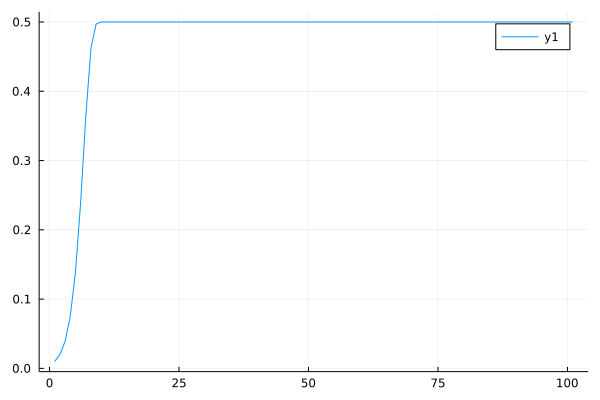

In [10]:
plot(orbita)

Este gráfico pode ficar mais apresentável utilizando pacotes como `LaTeXStrings` e alguns comando internos ao comando plots

In [39]:
using LaTeXStrings

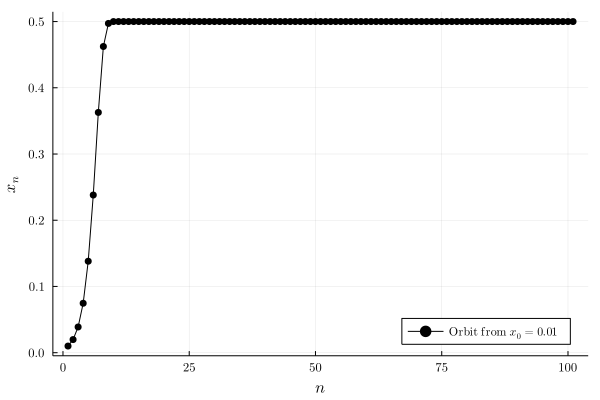

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132


In [12]:
plot(orbita,
    fontfamily = "Computer Modern",
    xlabel = L"n",
    ylabel = L"x_n",
    label = L"\mathrm{Orbit \ from } \ x_0 = 0.01",
    legend = :bottomright,
    lc = :black,
    markershape = [:circle],
    mc = :black
    )

#### Atividade 1:

Escolha um valor de $r$ entre $3.5$ e $4$ e crie o gráfico dos 100 primeiros pontos trajetória para duas condições iniciais: $x_0$ e $x_0 + \epsilon$ com $\epsilon < 0.01$

In [13]:
function mapa_logistico(r,x)
   return(r*x*(1-x)) 
end

mapa_logistico (generic function with 2 methods)

In [14]:
epsilon = 0.001
x1 = 0.4
x2 = x1 + epsilon
r = 3.73

3.73

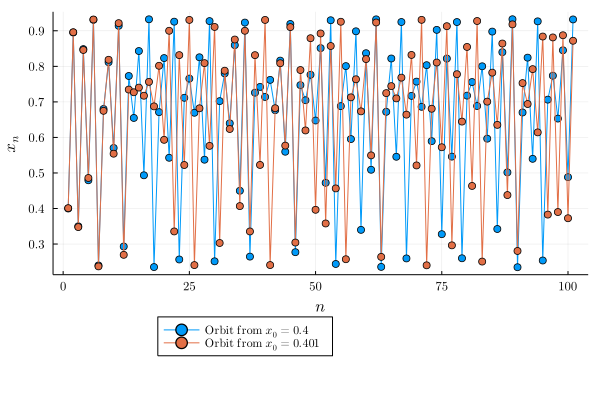

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132


In [15]:
ic = [x1, x2]
grafico = plot()
for j in ic
    x = j
    orbita = [x]
    for i in 1:max_iteracoes
        x = mapa_logistico(r, x)
        orbita = vcat(orbita, x)
    end
    grafico = plot!(orbita,
                    fontfamily = "Computer Modern",
                    xlabel = L"n",
                    ylabel = L"x_n",
                    label = L"\mathrm{Orbit \ from } \ x_0 = %$(j)",
                    legend = :outerbottom,
                    markershape = [:circle],
                )
end
grafico

#### Atividade 2:

Faça um gráfico que plota as diferenças entre as duas órbitas em cada instante de tempo

In [16]:
orbitax1 = [x1]
x = x1
for i in 1:max_iteracoes 
    x = mapa_logistico(r,x)
    orbitax1 = vcat(orbitax1, x)
end
transpose(orbitax1)

1×101 transpose(::Vector{Float64}) with eltype Float64:
 0.4  0.8952  0.349937  0.848505  0.479471  …  0.84516  0.488124  0.931974

In [17]:
orbitax2 = [x2]
x = x2
for i in 1:max_iteracoes 
    x = mapa_logistico(r,x)
    orbitax2 = vcat(orbitax2, x)
end
transpose(orbitax2)

1×101 transpose(::Vector{Float64}) with eltype Float64:
 0.401  0.895942  0.347747  0.846035  0.48587  …  0.88743  0.372619  0.871978

In [18]:
dif = orbitax1 .- orbitax2

101-element Vector{Float64}:
 -0.0010000000000000009
 -0.0007422699999999338
  0.002190409574368113
  0.0024699896458247883
 -0.006398835694588156
 -0.000827248329318131
  0.0026619265980333817
  0.005192620515978796
 -0.006873914405820081
  0.01615410268079387
 -0.007507348541087255
  0.023397749192795025
  0.038154330327989316
  ⋮
 -0.04573408357167327
 -0.08267307955796133
  0.13046034606748202
 -0.2522867340738383
  0.31238733165750765
 -0.630111225535106
  0.323427721072703
 -0.10761358073368876
  0.262944427237712
 -0.042269867899084934
  0.1155050096051401
  0.05999622367679103

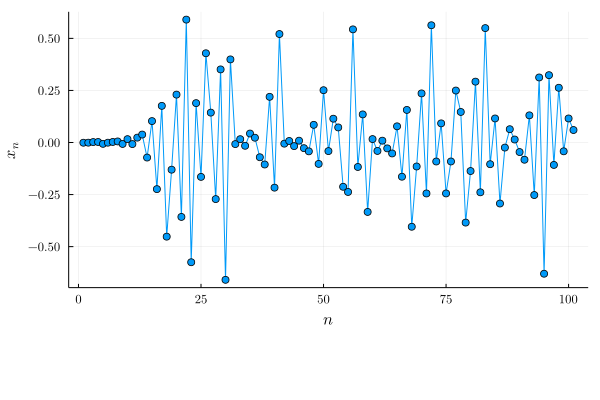

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
ERROR: syntax error


In [19]:
grafico = plot(dif,
                fontfamily = "Computer Modern",
                xlabel = L"n",
                ylabel = L"x_n",
                label = L"\mathrm{Diferença \ entre \ as \ órbitas}",
                legend = :outerbottom,
                markershape = [:circle],
                )

Agora, faça o gráfico do valor absoluto dessa diferença

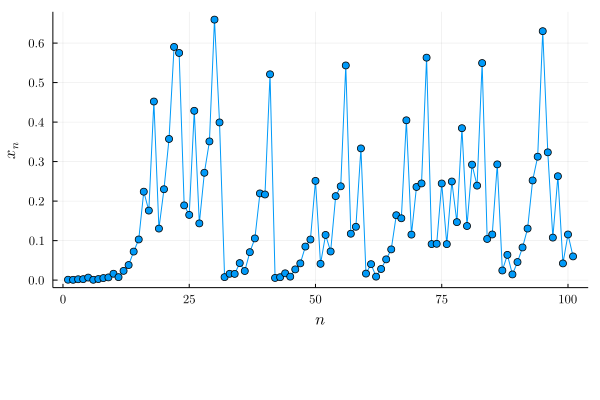

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:101.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
ERROR: syntax error


In [20]:
grafico = plot(abs.(dif),
                fontfamily = "Computer Modern",
                xlabel = L"n",
                ylabel = L"x_n",
                label = L"\mathrm{Diferença \ entre \ as \ órbitas}",
                legend = :outerbottom,
                markershape = [:circle],
                )

Agora vamos definir e observar as órbitas para um sistema bidimensional, o Mapa de Hénon.

$$\left\{\begin{array}{c} x_{n+1} &=& -x_n^2+by_n+a \\ y_{n+1} &=& x_n \end{array}\right.$$

Começaremos da mesma forma que com o mapa logístico, definindo uma função que calcula uma iteração do mapa, levando em conta já os parâmetros $a$ e $b$

In [29]:
function henon_map(x,y,a,b)
   return(-x^2+b*y+a, x)
end

henon_map (generic function with 1 method)

In [35]:
henon_map(x,y,a,b) = (-x^2+b*y+a,x)

henon_map (generic function with 1 method)

#### Atividade:

Gere os 1000 primeiros pontos de uma trajetória evoluida pelo Mapa de Hénon iniciada na condição $x_0 = 0, y_0 = 0$ com parâmetros $a = 1.2, b = 0.4$.

In [36]:
x=0
y=0
x_orb = x
y_orb = y
a = 1.2
b = 0.4
max_iteracoes = 1000
for i in 1:max_iteracoes
    (x,y) = henon_map(x,y,a,b)
    x_orb = vcat(x_orb, x)
    y_orb = vcat(y_orb, y)
end

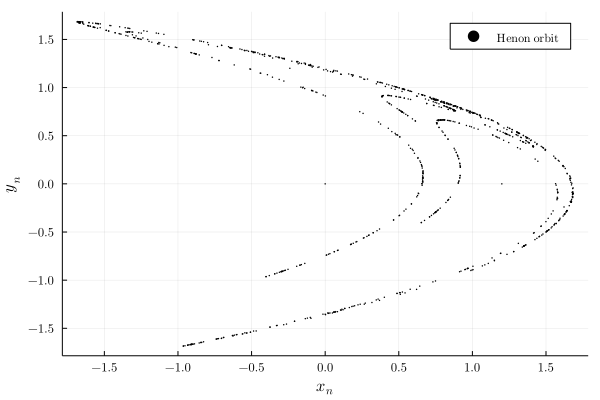

In [45]:
scatter(x_orb,y_orb,
    fontfamily = "Computer Modern",
    xlabel = L"x_n",
    ylabel = L"y_n",
    label = L"\mathrm{Henon \ orbit}",
    mc = :black,
    ms = 1
    )

Vamos ver o que acontece se calcularmos mais pontos da trajetória 

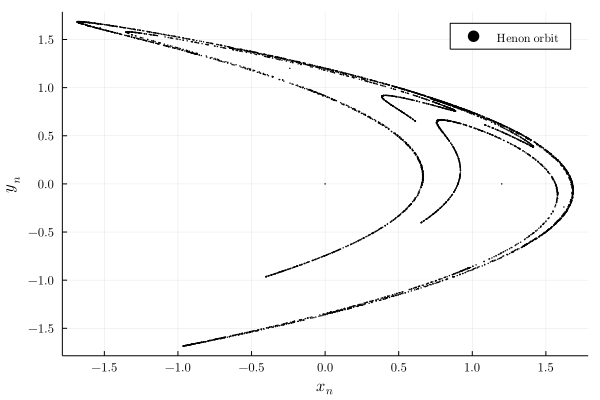

In [49]:
x=0
y=0
x_orb = x
y_orb = y
a = 1.2
b = 0.4
max_iteracoes = 5000
for i in 1:max_iteracoes
    (x,y) = henon_map(x,y,a,b)
    x_orb = vcat(x_orb, x)
    y_orb = vcat(y_orb, y)
end
scatter(x_orb,y_orb,
    fontfamily = "Computer Modern",
    xlabel = L"x_n",
    ylabel = L"y_n",
    label = L"\mathrm{Henon \ orbit}",
    mc = :black,
    ms = 1
    )

Até agora, trabalhamos de maneira muito braçal.

Vamos descobrir que o pacote DynamicalSytems.jl pode nos ajudar a ter muito menos trabalho!!!

In [2]:
using DynamicalSystems

Vamos começar definindo uma função para o mapa de Hénon de uma maneira que, em princípio parece mais complicada:

In [18]:
function henon_map_eq(du, u, p ,t) 
    du[1] = -u[1]^2+p[2]*u[2]+p[1]
    du[2] = u[1]
end

henon_map_eq (generic function with 1 method)

Nesta função, `u` é um vetor com no mínimo duas componentes, `du` é o estado seguinte deste vetor, `p` é um conjunto de 2 parâmetros e `t` serve como contador de tempo, apesar de não ser usado diretamente dentro do corpo da função.

O pacote DynamicalSystems.jl conta com uma função chamada `DiscreteDynamicalSystems(mapa, condicao_inicial, parametros)` que leva como argumentos: o `mapa` através de uma função, uma `condicao_inicial` que deve ser um vetor com a dimensão do mapa, e os `parametros` que deve ser um vetor onde cada componente é um parâmetro

In [22]:
condicao_inicial = zeros(2)
parametros = [1.2, 0.4]

2-element Vector{Float64}:
 1.2
 0.4

In [23]:
henon = DiscreteDynamicalSystem(henon_map_eq, condicao_inicial, parametros)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 rule f:      henon_map_eq
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [1.2, 0.4]

Agora, por meio de uma outra função muito útil do pacote DynamicalSystems, calcula-se toda a evolução temporal do mapa até um tempo T.

A função é `trajectory(sistema, T; Transiente = Ttr, Passo = dt)`

In [24]:
tr = trajectory(henon,10000; Ttr = 1000, dt = 1)

2-dimensional Dataset{Float64} with 10001 points
 -1.26639    1.56876
  0.223765  -1.26639
  0.643374   0.223765
  0.875576   0.643374
  0.690716   0.875576
  1.07314    0.690716
  0.324652   1.07314
  1.52386    0.324652
 -0.992282   1.52386
  0.82492   -0.992282
  0.122595   0.82492
  1.51494    0.122595
 -1.046      1.51494
  ⋮         
  0.557218   0.972474
  1.2785     0.557218
 -0.21167    1.2785
  1.66659   -0.21167
 -1.66221    1.66659
 -0.896293  -1.66221
 -0.268224  -0.896293
  0.769539  -0.268224
  0.50052    0.769539
  1.25729    0.50052
 -0.180582   1.25729
  1.67031   -0.180582

Ela retorna um `Dataset`, que não é uma matriz, mas um conjunto de dados igualmente espaçados. Para manipulações, podemos transformar em uma matriz através de

In [28]:
tr = Matrix(tr[:,:])

10001×2 Matrix{Float64}:
 -1.26639    1.56876
  0.223765  -1.26639
  0.643374   0.223765
  0.875576   0.643374
  0.690716   0.875576
  1.07314    0.690716
  0.324652   1.07314
  1.52386    0.324652
 -0.992282   1.52386
  0.82492   -0.992282
  0.122595   0.82492
  1.51494    0.122595
 -1.046      1.51494
  ⋮         
  0.557218   0.972474
  1.2785     0.557218
 -0.21167    1.2785
  1.66659   -0.21167
 -1.66221    1.66659
 -0.896293  -1.66221
 -0.268224  -0.896293
  0.769539  -0.268224
  0.50052    0.769539
  1.25729    0.50052
 -0.180582   1.25729
  1.67031   -0.180582

Veja como em pouquíssimas linhas, definimos e obtivemos a evolução de um sistema.

Isso pode ser feito com qualquer sistema, com qualquer dimensionalidade e qualquer número de parâmetros.

Na realidade, os principais sistemas dinâmicos já estão pré-definidos dentro do pacote e podem ser consultados em [Predefined Dynamical Systems](https://juliadynamics.github.io/DynamicalSystems.jl/dev/ds/predefined/)

Com isso, podemos acessar e calcular trajetórias de sistemas variados e estudar suas propriedades e dinâmicas sem nos preocuparmos com a implementação correta e mais rápida, pois isso já está feito.

No entanto, é importante saber definir sistemas novos, como fizemos, pois a pesquisa é feita em cima de variações de sistemas já bem conhecidos, ou em novos sistemas!

Para chamar um sistema dinâmico pré-definido usamos o módulo `Sytems` do pacote DynamicalSystems.jl, da seguinte forma:

Para o mapa de Rulkov, um mapa bidimensional que modela a fenomenologia de um neurônio com *spikes* e *bursts*, dado pela equação de diferença

$$\begin{array}{l} x_{n+1} = \dfrac{\alpha}{1+x_n^2} +y_n \\ y_{n+1} = y_n - \sigma x_n - \beta \end{array}$$

In [29]:
cond_inicial = [1.0, 1.0] #x_0  e y_0
sist_din = Systems.rulkovmap(cond_inicial, α = 4.1, β = 0.001, σ = 0.001)

2-dimensional discrete dynamical system
 state:       [1.0, 1.0]
 rule f:      rulkovmap_rule
 in-place?    false
 jacobian:    rulkovmap_jac
 parameters:  [4.1, 0.001, 0.001]

In [36]:
tr_rulkov = trajectory(sist_din, 2000; Ttr = 9000)

2-dimensional Dataset{Float64} with 2001 points
  1.25988    -2.77555
 -1.19088    -2.77781
 -1.08233    -2.77762
 -0.889474   -2.77754
 -0.488524   -2.77765
  0.532393   -2.77816
  0.416375   -2.77969
  0.714522   -2.78111
 -0.0668502  -2.78282
  1.29894    -2.78376
 -1.25802    -2.78605
 -1.19852    -2.7858
 -1.10302    -2.7856
  ⋮          
 -1.97162    -2.80755
 -1.96864    -2.80658
 -1.96565    -2.80561
 -1.96264    -2.80464
 -1.95962    -2.80368
 -1.95659    -2.80272
 -1.95355    -2.80176
 -1.9505     -2.80081
 -1.94744    -2.79986
 -1.94436    -2.79891
 -1.94127    -2.79797
 -1.93816    -2.79703

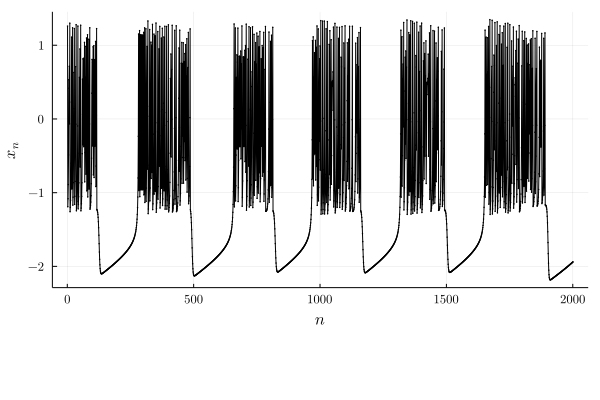

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:2001.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:2001.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
ERROR: syntax error


In [43]:
plot(tr_rulkov[:,1],
    fontfamily = "Computer Modern",
    xlabel = L"n",
    ylabel = L"x_n",
    label = L"\mathrm{Diferença \ entre \ as \ órbitas}",
    legend = :outerbottom,
    markershape = [:circle],
    lc = :black,
    mc = :black, 
    ms = 1
    )

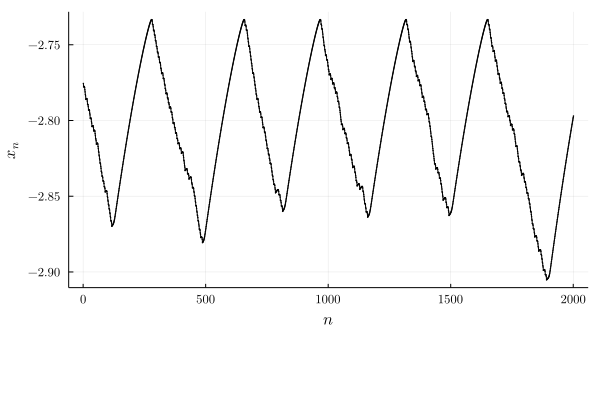

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:2001.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:2001.
└ @ Plots C:\Users\Poli\.julia\packages\Plots\cPJQu\src\utils.jl:132
ERROR: syntax error


In [44]:
plot(tr_rulkov[:,2],
    fontfamily = "Computer Modern",
    xlabel = L"n",
    ylabel = L"x_n",
    label = L"\mathrm{Diferença \ entre \ as \ órbitas}",
    legend = :outerbottom,
    markershape = [:circle],
    lc = :black,
    mc = :black, 
    ms = 1
    )

#### Atividade 4:

Escolha um mapa [pré-definido](https://juliadynamics.github.io/DynamicalSystems.jl/dev/ds/predefined/) no pacote Dynamical Systems, calcule e plote a trajetória.

In [ ]:
ikeda = 